Matthew Virgin  
COS 575  
Homework 3  
5 April 2024  

In [157]:
import numpy as np
import scipy.io as sio

np.random.permutation
np.random.seed(0)

## fetch data
nuclear_dat = sio.loadmat('nuclear.mat')
x = nuclear_dat['x']
y = nuclear_dat['y']
d,n= x.shape    # n = num samples, d = num features

# 20,000 samples
# 2 features

# y has 1 and -1, binary classification

In [158]:
## provided subgradient - assumes bias term is placed after the weights
def subg(w, b, x, y, lambda_, n):       # x and y are data pts here (1 example)
    ## true means current data pt is on the wrong side of decision boundary, update weights and bias
    if ((1.0 - y*(w.dot(x) + b)) > 0):
        ## u is the subgradient vector - b (bias) is concatenated after the weights
        u = np.concatenate([-1./n * (y*x - lambda_*w), -1./n*y], axis = 0)
    else:   # data pt on correct side, update weights only   
        u = np.concatenate([1./20000 * lambda_*w, np.array([0])], axis = 0)
    
    return u

In [159]:
def jay(w, b, x, y, lambda_, n):    # x and y are entire datasets
    hinge = np.maximum(0, 1 - y * (np.dot(x, w) + b))
    j = np.mean(hinge) + 0.5 * lambda_ * np.linalg.norm(w)**2
    return j

#TODO for b, in inner loop, each u we calculate is a subgrad of ji (ie subgrad of ji for ith datapt)
def subg_desc(X, Y, w, b, lambda_, n, max_iter):
    J_vals = []
    for i in range(1, max_iter+1):
        u = np.zeros(d+1)   # init subgrad vector, +1 because bias 

        for j in range(n):  # calc subgrad by summing each data pt
            u += subg(w, b, X[:,j], Y[:,j], lambda_, n)     #ui subgrad of ji
        
        # u after loop finishes is subgrad of j
        step_size = 100/i   # ie learning rate
        u_w = u[:2]  # extract w from u
        u_b = u[2]   # extract b from u
        
        w -= step_size * u_w
        b -= step_size * u_b

        j = jay(X, Y, w, b, lambda_, n)
        J_vals.append(j)

    return w, b, J_vals

In [160]:
### main action

## create theta 
w = np.zeros(d)   
# w = np.random.randn(d)

## define lambda
lambda_ = .001

## init bias
b = 1

## init iterations
itr = 100

w_optimal, b_optimal, J_values = subg_desc(x, y, w, b, lambda_, n, itr)

print("optimal w is: ", w_optimal)
print("optimal b is: ", b_optimal)
print("minimal J is: ", np.min(J_values))

optimal w is:  [-3.09412703 15.35317162]
optimal b is:  -0.9907572675259332
minimal J is:  28.74316047784425


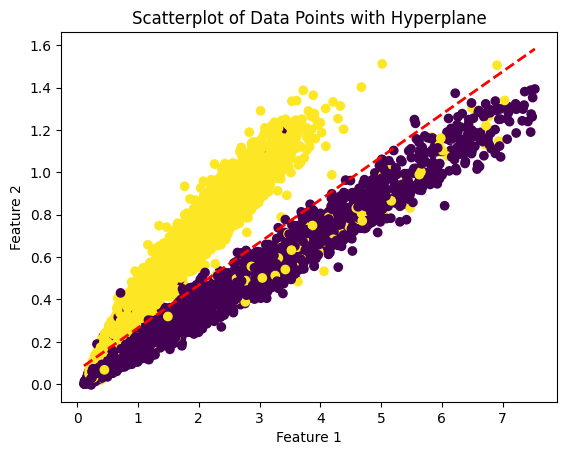

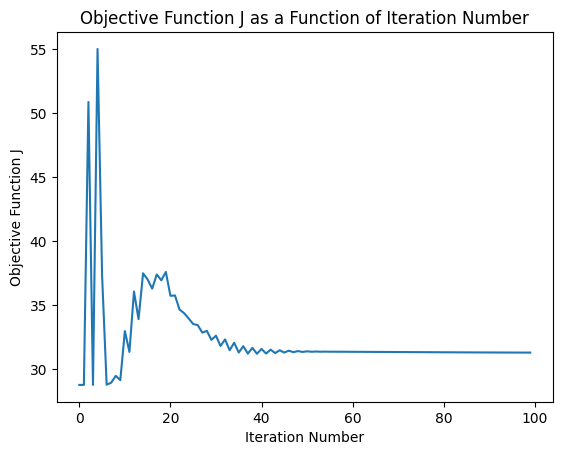

In [161]:
import matplotlib.pyplot as plt

# Calculate the y-values of the hyperplane
x_min = np.min(x[0])
x_max = np.max(x[0])
x_hyperplane = np.linspace(x_min, x_max, 100)
y_hyperplane = -(w_optimal[0] * x_hyperplane + b_optimal) / w_optimal[1]

# Plot the data points on a scatterplot
plt.scatter(x[0], x[1], c=y, cmap='viridis')

# Plot the hyperplane
plt.plot(x_hyperplane, y_hyperplane, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Data Points with Hyperplane')

plt.show()

# Plot the Js as a function of iteration number
plt.plot(range(len(J_values)), J_values)
plt.xlabel('Iteration Number')
plt.ylabel('Objective Function J')
plt.title('Objective Function J as a Function of Iteration Number')

plt.show()
